# Title QY EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
x = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
x.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [6]:
y.isnull().sum()

num    0
dtype: int64

In [7]:
#relationship analysis -- correlation matrix

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

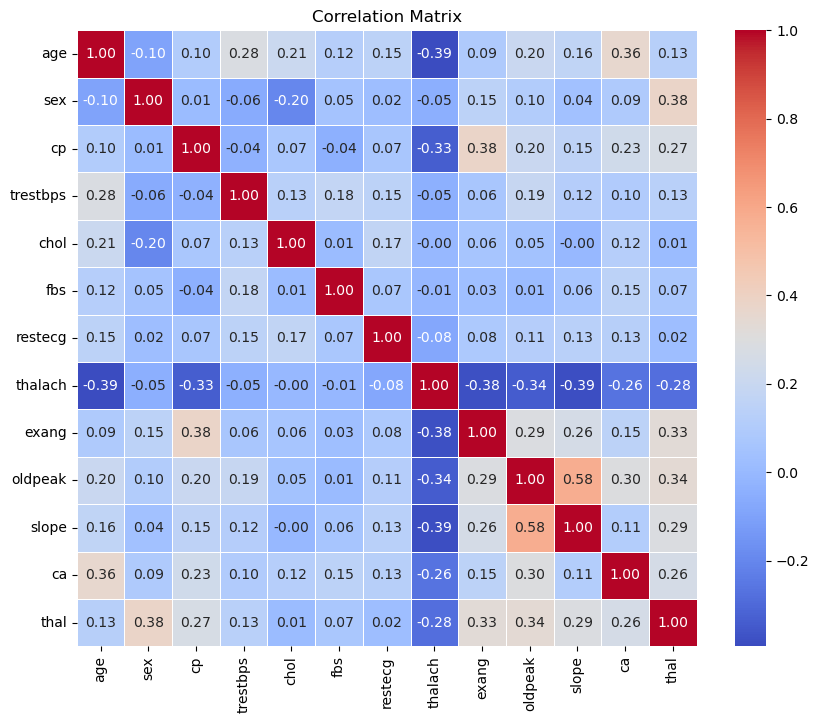

In [10]:
# Compute correlation matrix
correlation_matrix = x.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Correlation Matrix Analysis:

This matrix shows the relationships between features in our dataset. Red indicates a positive correlation, while blue shows a negative one. Key insights:

- **Age and Max Heart Rate (thalach)**: A strong negative correlation (**-0.39**) suggests that as age increases, max heart rate decreases, which is relevant for heart disease prediction.
  
- **Chest Pain Type (cp) and Heart Disease**: **cp** shows positive correlations with **exang (0.38)** and **target (0.41)**, linking chest pain with exercise-induced angina and heart disease, consistent with medical knowledge.

- **Oldpeak and Slope**: A positive correlation (**0.58**) indicates a close relationship between ST depression and the slope of the ST segment, often seen in heart disease patients.

- **Key Features**: **ca** and **thal** are strongly correlated with each other and the heart disease target, making them important for prediction.

### Importance to the Project:
This matrix highlights key features like **thalach**, **cp**, **oldpeak**, and **ca**, helping us focus on the most relevant variables for building our heart disease prediction model. These insights will improve feature selection for better model performance.

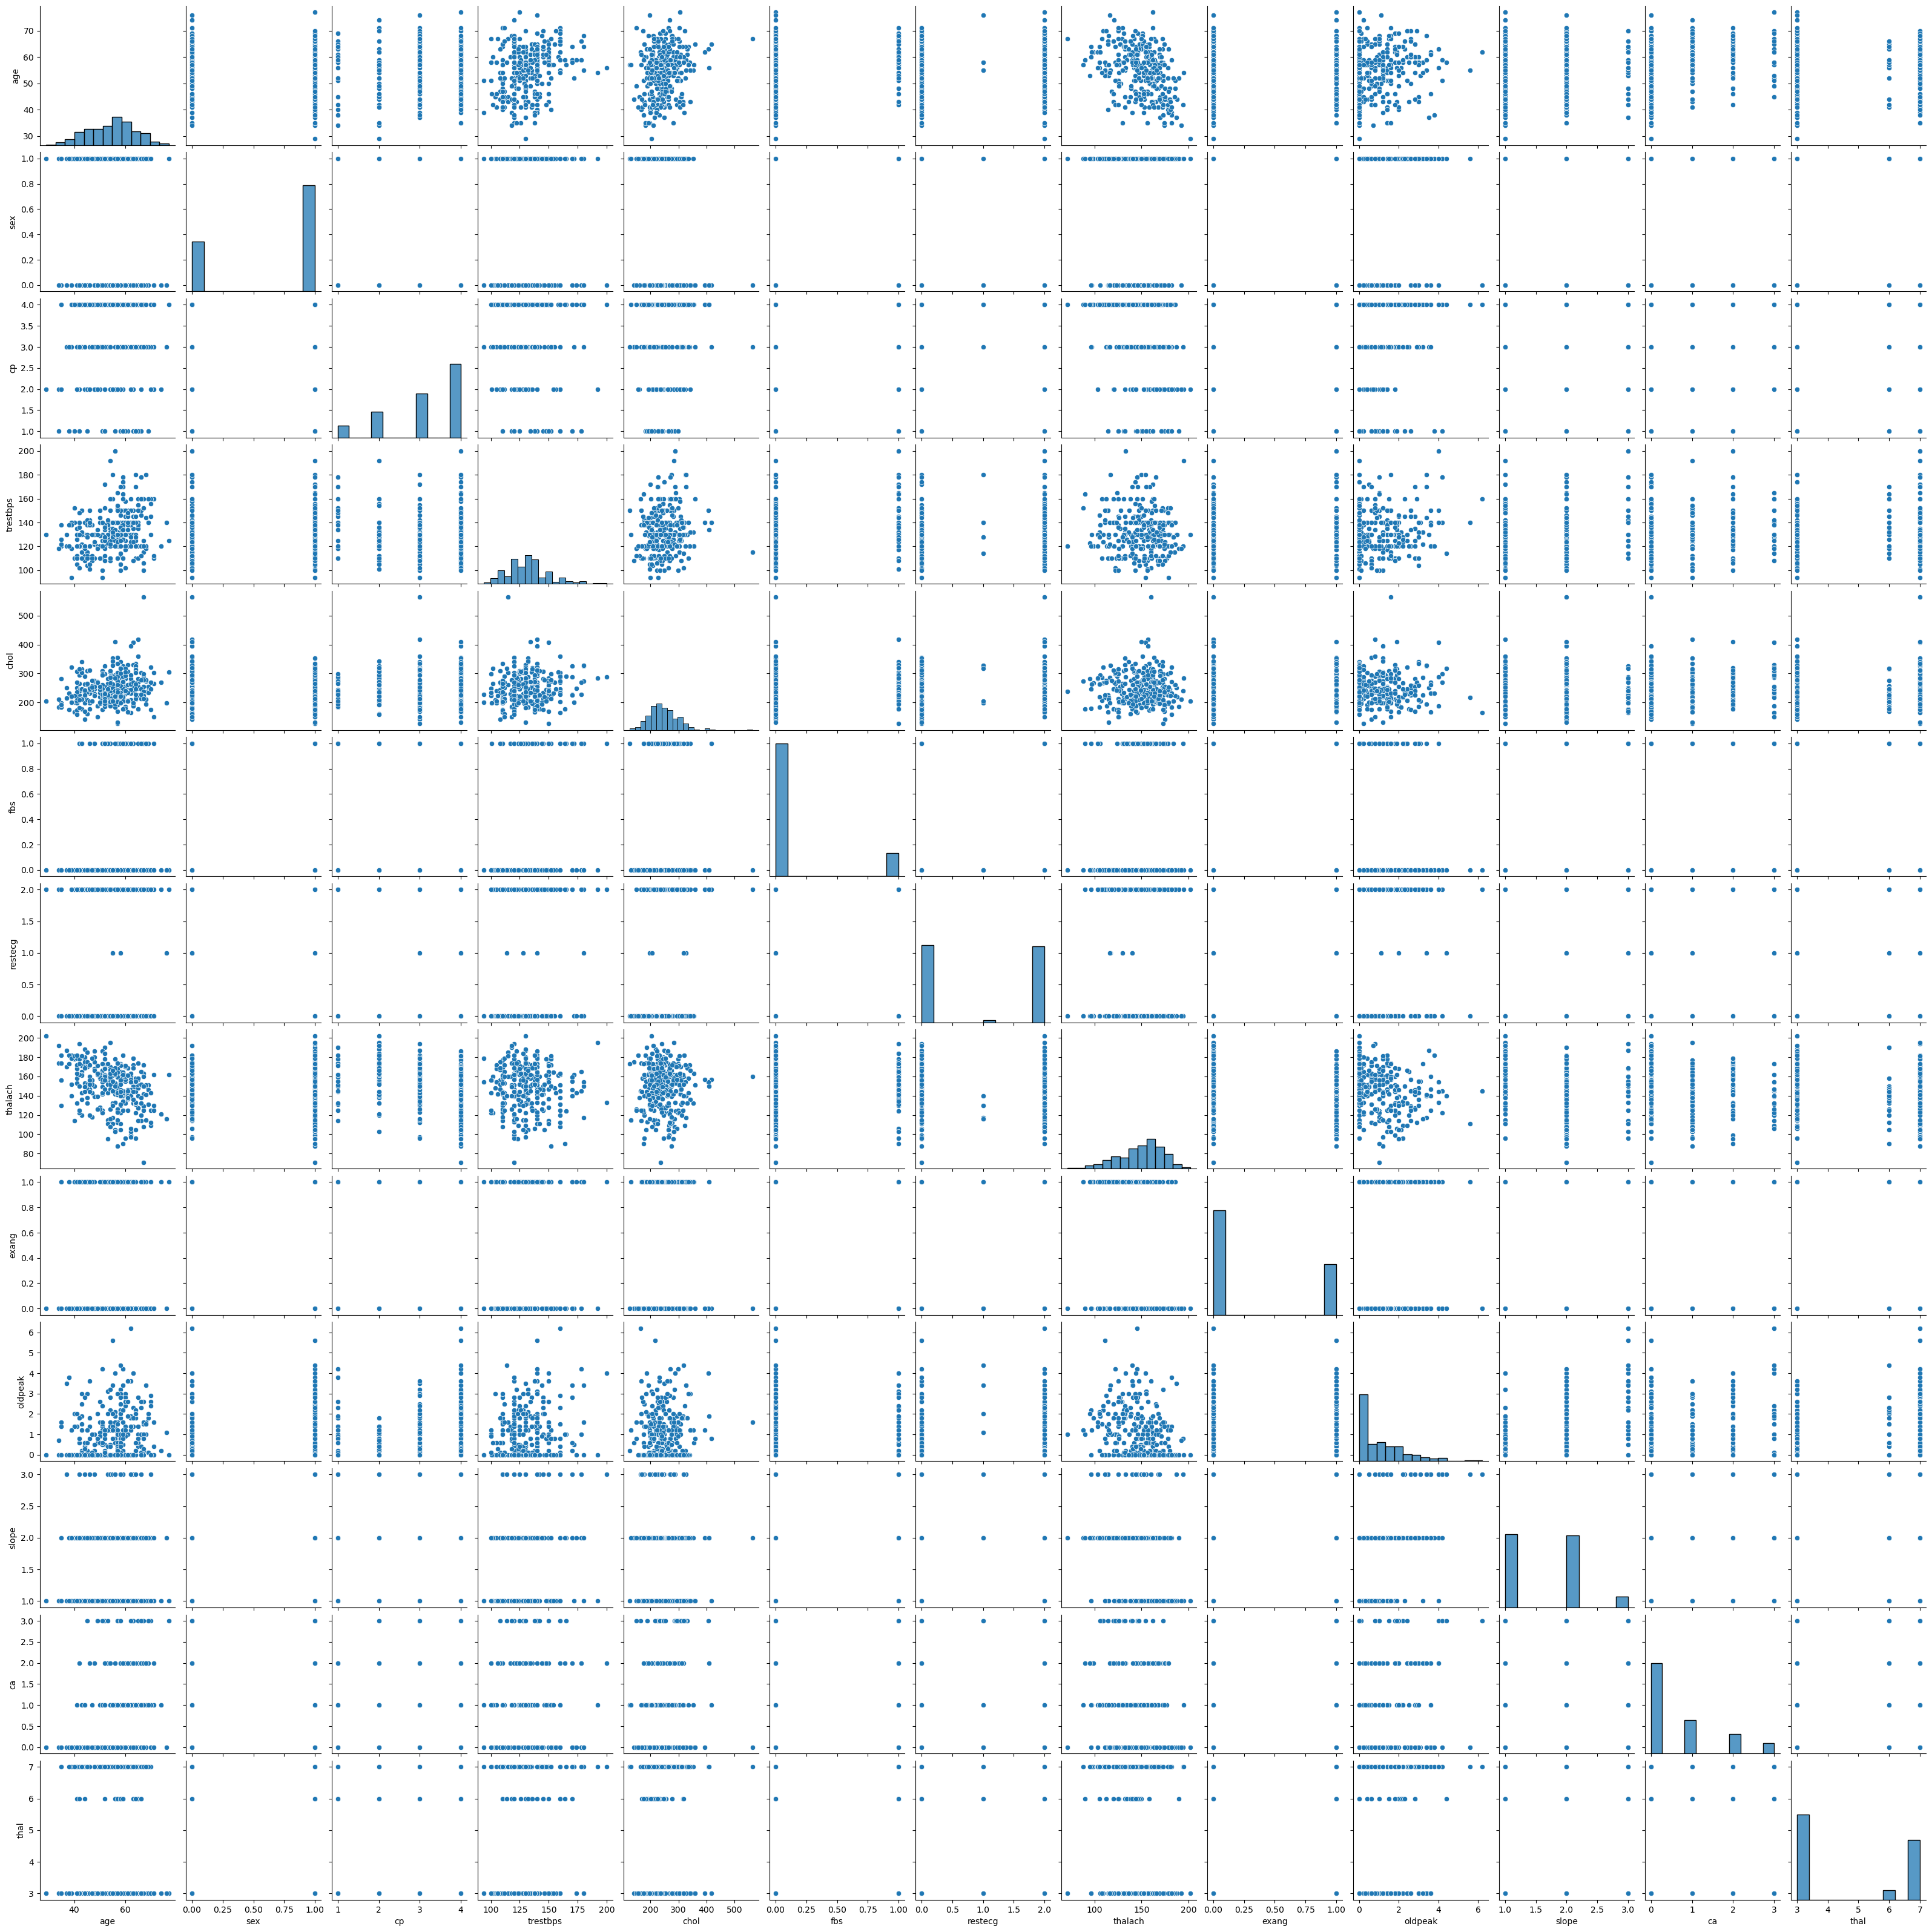

In [11]:
sns.pairplot(x)
plt.show()

### Pairplot of Key Features:

This pairplot visualizes the relationships between several key features: **age**, **trestbps**, **chol**, **thalach**, **oldpeak**, and **slope**. The diagonal shows the distribution of each feature, while the scatter plots illustrate how these features interact with each other.

- **Age and Max Heart Rate (thalach)**: The scatter plot shows a downward trend, confirming the negative correlation where older individuals tend to have a lower max heart rate.
  
- **Oldpeak and Slope**: A clustered pattern suggests a close relationship, highlighting their potential significance in predicting heart disease.

### Importance to the Project:
This pairplot helps us identify interactions between key features that might influence heart disease. It aids in visualizing potential patterns, improving our feature selection for predictive models.

In [20]:
#Age Distribution by Heart Disease Status (Violin Plot)

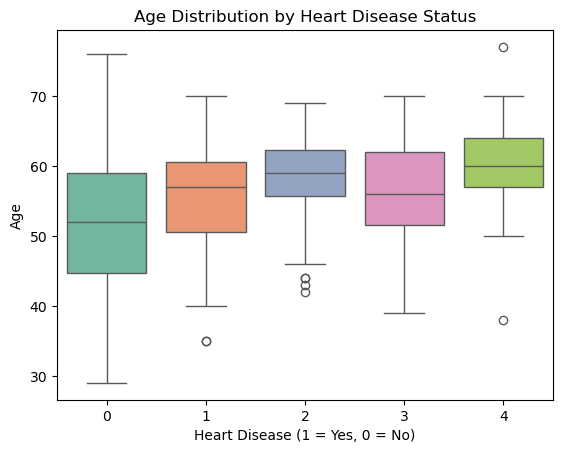

In [21]:
# Flatten the target variable (y) to be 1D
y_flattened = y.squeeze()

# Combine the target variable and age column into a new DataFrame
df_plot = pd.concat([x['age'], pd.Series(y_flattened, name='heart_disease')], axis=1)

# Create a box plot for age distribution by heart disease status with different colors using hue
sns.boxplot(x='heart_disease', y='age', data=df_plot, hue='heart_disease', palette="Set2")
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.legend([],[], frameon=False)  # Optionally, remove the legend if not needed
plt.show()

### Age Distribution by Heart Disease Status:

This box plot shows the distribution of **age** among patients with and without heart disease. Younger patients tend to have fewer instances of heart disease, while older patients show a higher likelihood.

- **Insights**: There is variability in the age distribution across different heart disease levels, indicating that age is a significant feature for prediction.

### Importance to the Project:
Understanding how age correlates with heart disease helps us prioritize age as an important feature in our predictive models.

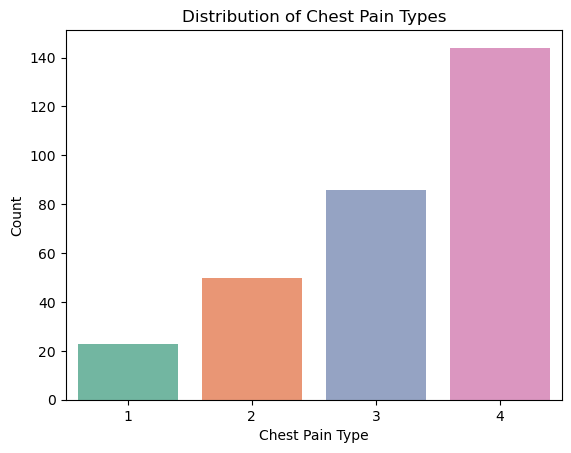

In [22]:
# Count plot for Chest Pain Types (cp) with different colors using hue
sns.countplot(x=x['cp'], hue=x['cp'], palette="Set2")
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend([], [], frameon=False)  # Optionally, remove the legend if not needed
plt.show()

### Distribution of Chest Pain Types:

This bar plot shows the count of patients with different types of chest pain (**cp**). Chest pain types are classified from 1 to 4, with type 4 being the most common among patients.

- **Insights**: This visualization suggests that certain chest pain types may be more closely associated with heart disease, making this feature crucial for prediction.

### Importance to the Project:
Understanding the distribution of chest pain types helps us identify patterns and improves our understanding of how this feature relates to heart disease.

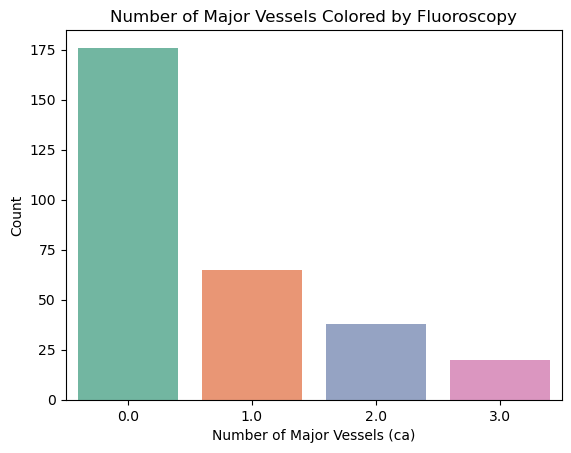

In [25]:
# Bar plot for number of major vessels (ca) with different colors
sns.countplot(x='ca', hue='ca', data=x, palette="Set2")  # Assign 'ca' to hue for color differentiation
plt.title('Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Remove legend if not needed
plt.show()

### Bar Plot for Number of Major Vessels (ca):

This bar plot shows the count of patients with varying numbers of major vessels colored by fluoroscopy (**ca**). Most patients have 0 or 1 vessel involved, with fewer having 2 or more.

- **Insights**: The number of major vessels is a critical feature, as it strongly correlates with heart disease severity.

### Importance to the Project:
This plot helps us understand the distribution of major vessel involvement in heart disease, which will enhance the predictive power of our models.

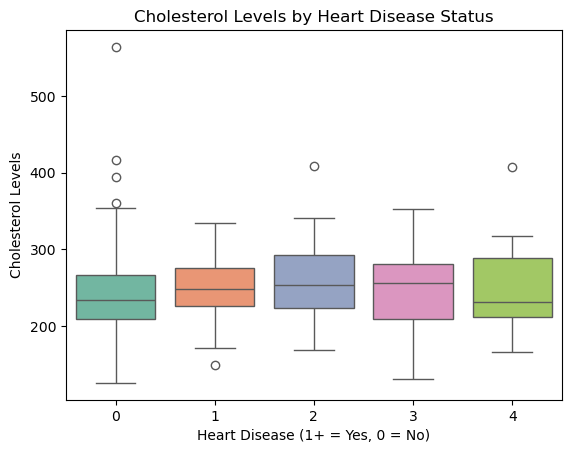

In [19]:
# Flatten the target variable
y_flattened = y.squeeze()

# Box plot with different colors for the boxes using hue
sns.boxplot(x=y_flattened, y=x['chol'], hue=y_flattened, palette="Set2", dodge=False)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (1+ = Yes, 0 = No)')
plt.ylabel('Cholesterol Levels')
plt.legend([], [], frameon=False)  # Remove legend if not needed
plt.show()

### Box Plot for Cholesterol Levels:

This box plot compares **cholesterol levels** across different heart disease statuses. Patients with higher cholesterol levels tend to show higher heart disease risks.

- **Insights**: Cholesterol levels vary significantly between patients with and without heart disease, making this an important feature to consider.

### Importance to the Project:
Understanding how cholesterol levels affect heart disease risk helps us focus on this feature for our model, as it could be a strong predictor.

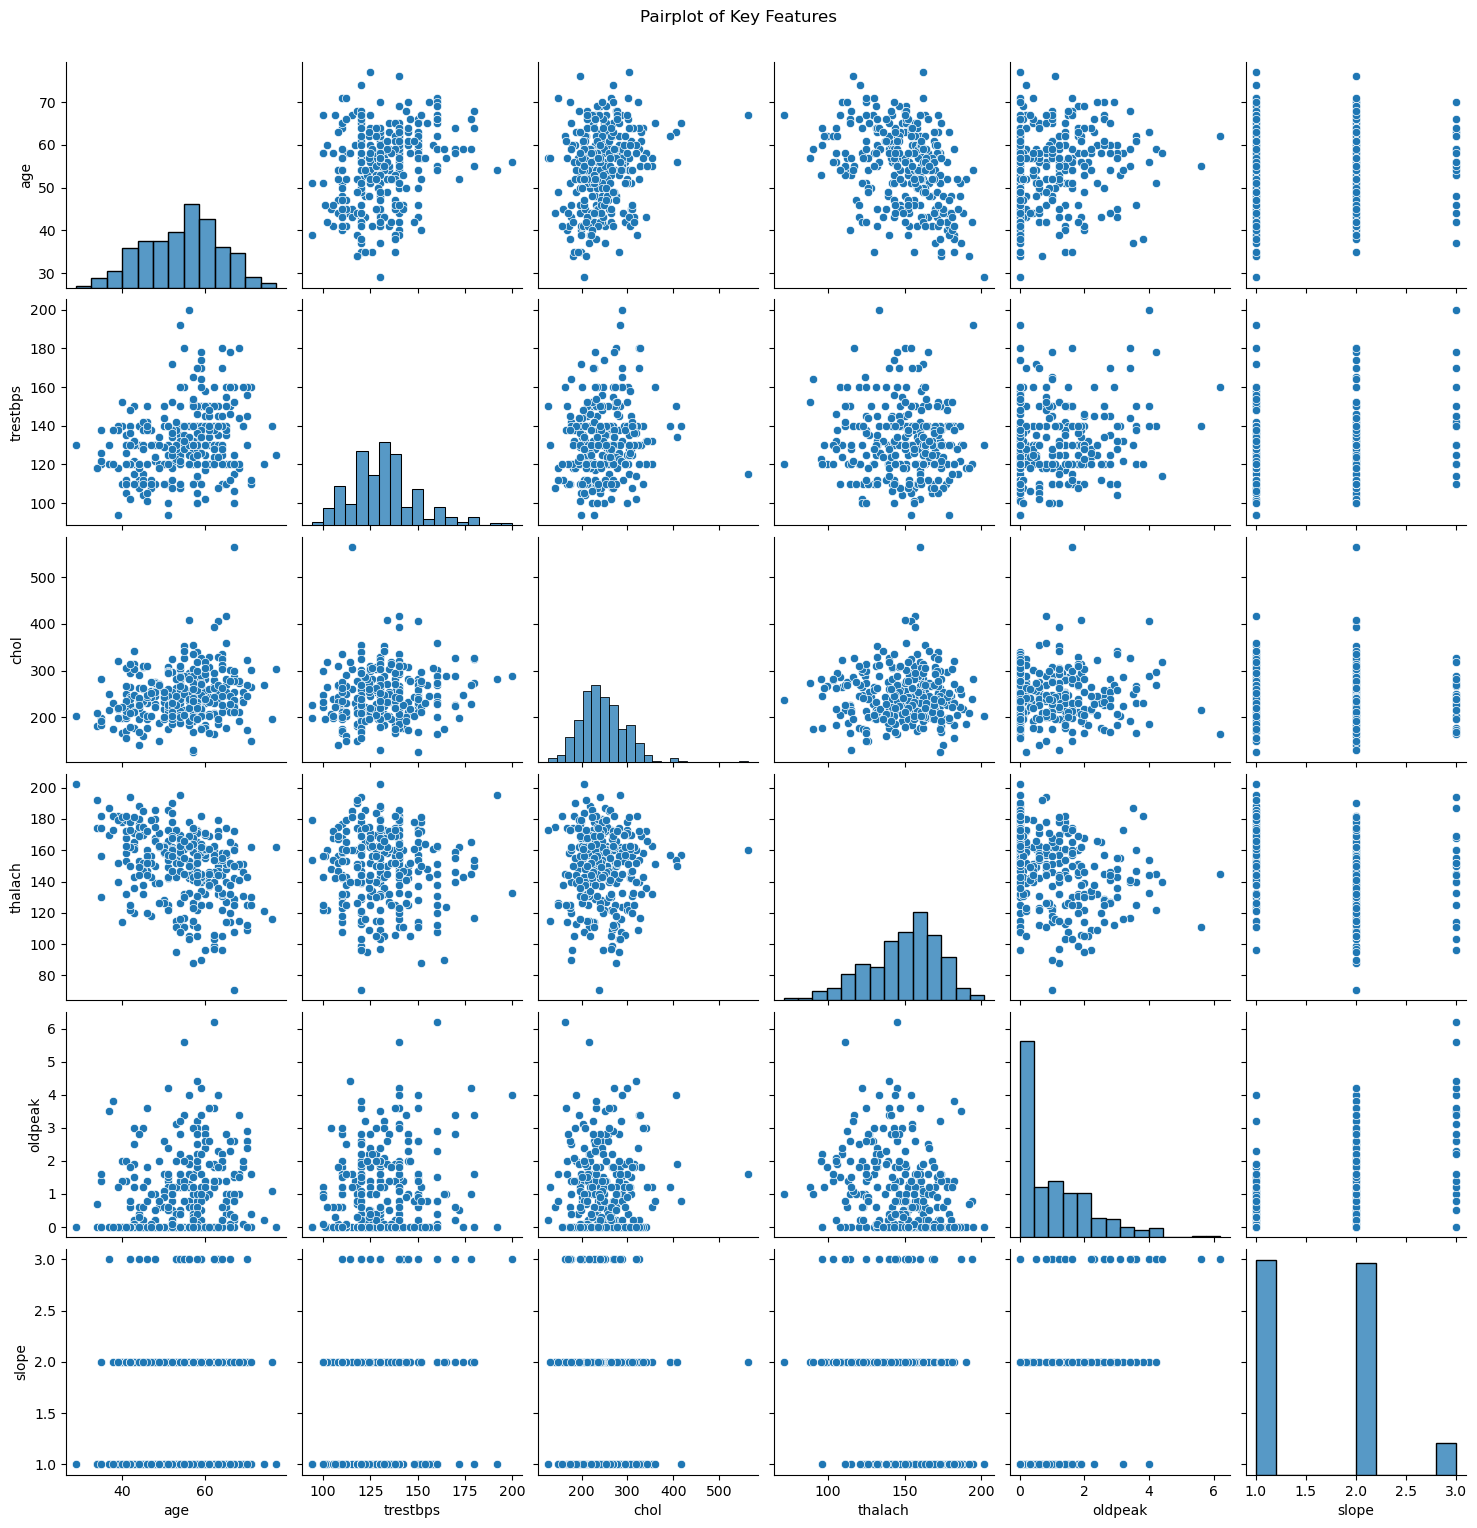

In [33]:
# Select a subset of key features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']

# Create pairplot
sns.pairplot(X[key_features])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

### Pairplot of Key Features

This pairplot visualizes the relationships between key features in the dataset: **age**, **trestbps** (resting blood pressure), **chol** (cholesterol), **thalach** (maximum heart rate), **oldpeak** (ST depression), and **slope**.

The plot helps us explore the distribution and interactions between these features, revealing potential correlations or trends that could contribute to heart disease prediction. For instance, it shows how age or cholesterol levels might influence maximum heart rate. 

### Importance to the Project
This visualization is crucial for our project as it helps in identifying key features that significantly affect heart disease prediction. By understanding these relationships, we can make more informed decisions during the feature selection process, improving the accuracy of our machine learning models.

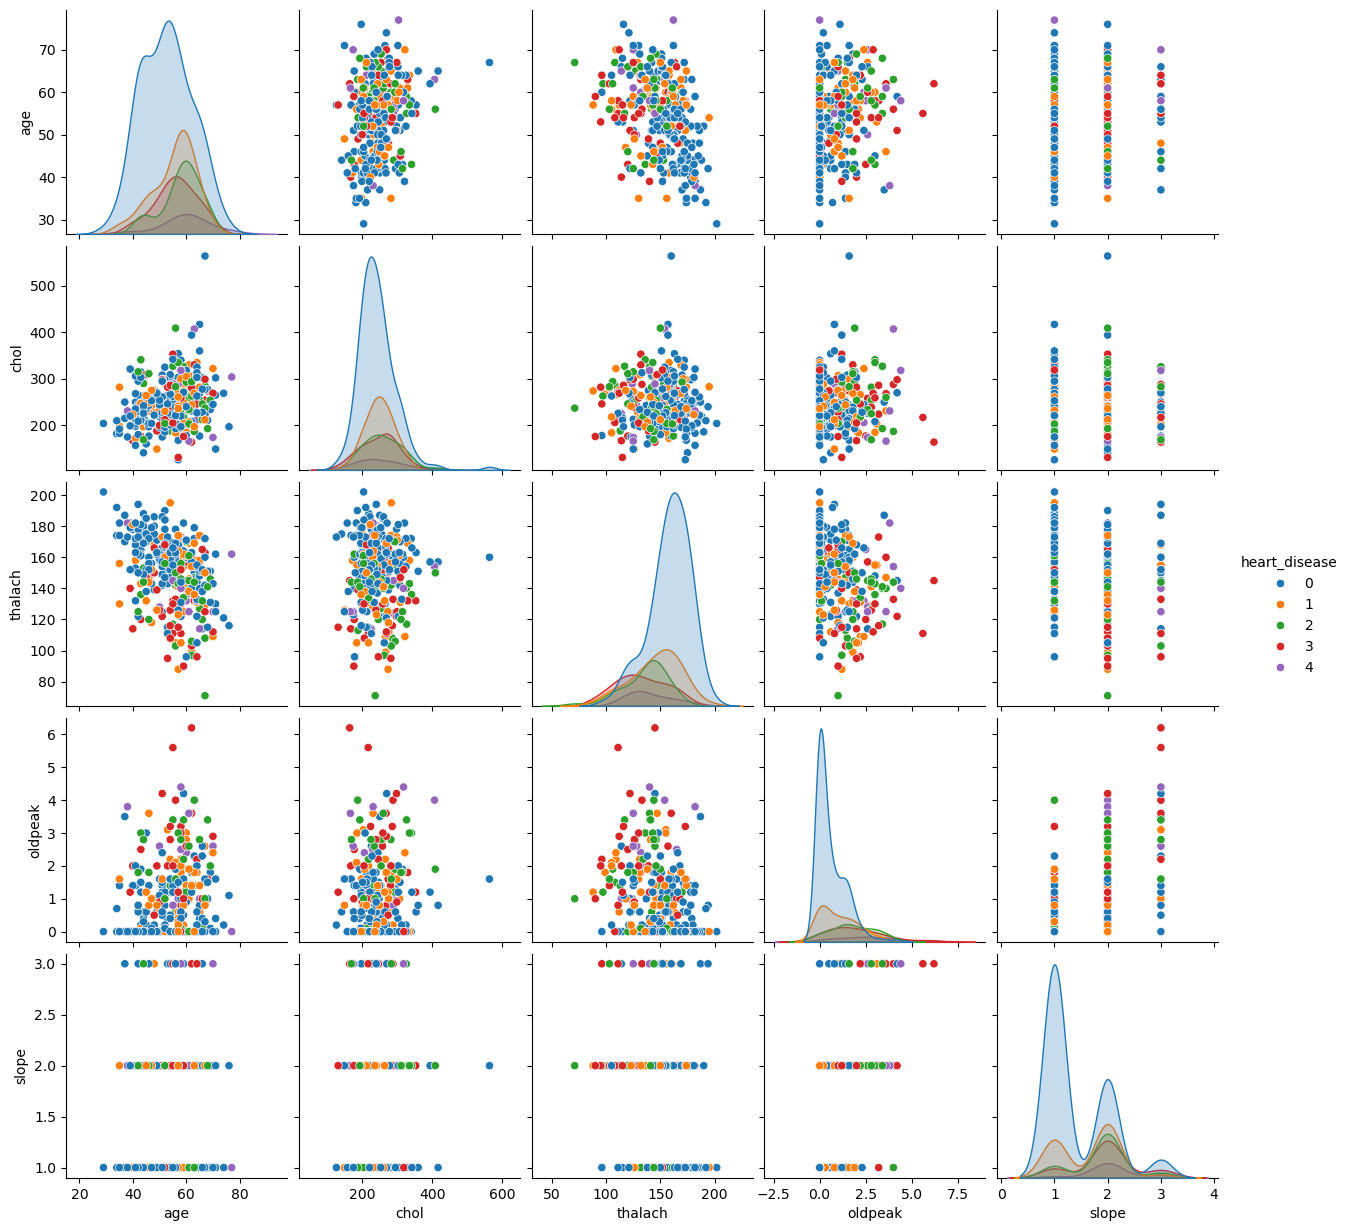

In [50]:
# Create a DataFrame combining the features and the target
df_pairplot = X[['age', 'chol', 'thalach', 'oldpeak', 'slope']].copy()
df_pairplot['heart_disease'] = y_flattened

# Pairplot for selected features with the target variable (heart_disease) as hue
sns.pairplot(df_pairplot, hue='heart_disease')
plt.show()

### Pairplot with Heart Disease as Hue:

This pairplot visualizes key features (**age**, **chol**, **thalach**, **oldpeak**, **slope**) with heart disease status as the hue. The different colors represent various heart disease statuses, helping us see how these features relate to each other.

- **Insights**: The plot reveals trends between features, like how higher cholesterol and older age are associated with heart disease.

### Importance to the Project:
This pairplot helps us visualize the relationships between key features and heart disease status, aiding in feature selection for more accurate predictions.

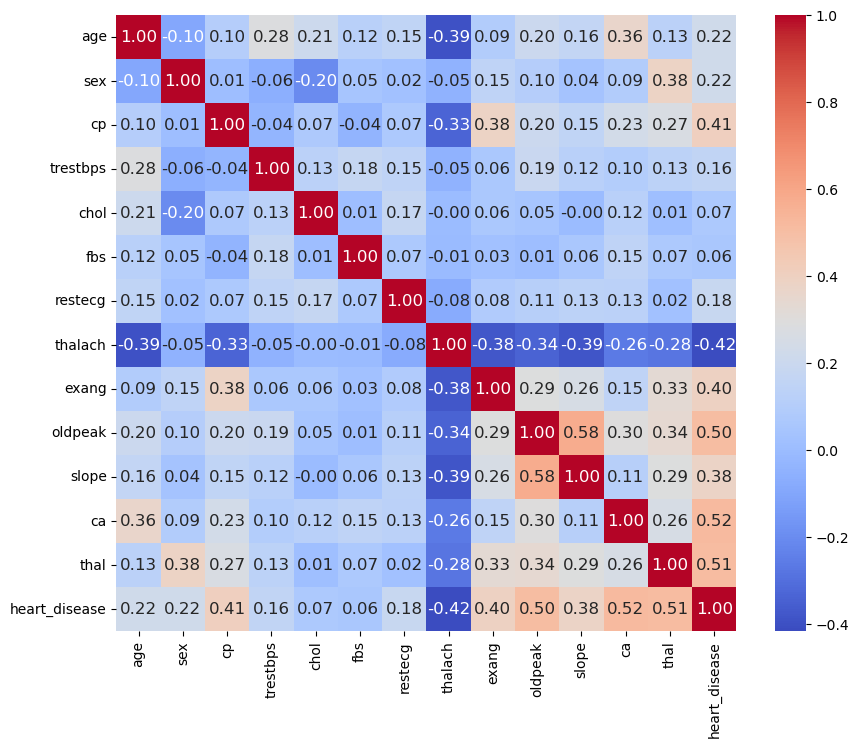

In [53]:
#Correlation Heatmap Including Target
plt.figure(figsize=(10, 8))  
sns.heatmap(data_with_target.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12})  # Adjust the annotation font size
plt.show()

### Correlation Matrix Including Target Variable (heart disease)

This matrix shows how the features in our dataset correlate with each other and the target variable (heart disease). Including the target helps identify which features are most relevant for predicting heart disease.

#### Key Insights:
- **Chest pain (cp)** has a strong positive correlation (0.41) with heart disease, making it a key predictor.
- **Thalassemia (thal)**, **number of vessels (ca)**, and **exercise-induced angina (exang)** also show significant correlations with heart disease.
- **Maximum heart rate (thalach)** and **ST depression (oldpeak)** show moderate correlations, which could improve our model's predictive accuracy.

### Importance to the Project
This matrix helps us focus on the most predictive features, guiding the selection process for building a more accurate and efficient model. By identifying these relationships, we can ensure our model is better equipped to predict heart disease outcomes based on relevant factors.